## Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problema

En este problema vamos a estudiar la tranformada discreta de Fourier para el análisis de imagenes. Considere la imagen "blurredcity.png", de la cual tomamos solo una sección de la imagen. Para poder leer la imagen este notebook debe estar en la carpeta Datafiles del github del curso.

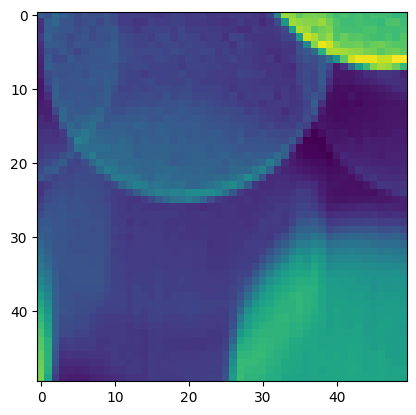

In [2]:
# Lectura de la imagen de circulos, no modificar
image_city = plt.imread('blurredcity.png').astype(float)
circles_image = image_city[300:350, 170:220, 0]

plt.imshow(circles_image)

a) Implemente la transformada discreta de Fourier en 2D dada por,

$$
  F[k, l] = \frac{1}{\sqrt{MN}}\sum_{m=0}^{M-1}\sum_{n=0}^{N-1}f[m, n]\exp{\Big[-i2\pi\big(\frac{km}{M}+ \frac{ln}{N}\big)\Big]}
$$

La cual recibe una imagen de dimensión (m, n), y retorna una matrix de dimensión (m, n) que corresponde al espacio de frecuencias.

In [3]:
def DFT_lenta_2D(image_param):
    # Dimensiones de la imagen de entrada
    N = image_param.shape[0]  # filas
    M = image_param.shape[1]  # columnas
    
    # Matriz para almacenar los valores de la DFT
    frequency_matrix = np.zeros((N, M)).astype(complex)
    
    # Bucle para recorrer dicha matriz
    for k in range(N):
        for l in range(M):
            # Bucle para iterar a través de los píxeles en la imagen de entrada
            for m in range(N):
                for n in range(M):
                    # DFT en 2D
                    frequency_matrix[k, l] += (image_param[m, n] * np.exp(-1j * 2 * np.pi * ((k * m / N) + (l * n / M))))/np.sqrt(N * M)
    return frequency_matrix

frequency_image = DFT_lenta_2D(circles_image)


b) Realice un grafico que muestre la imagen en el espacio de frecuencias.

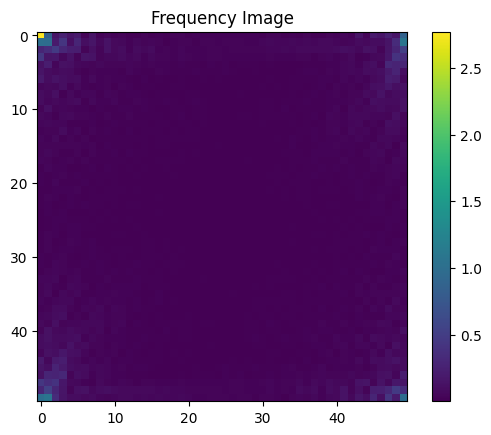

In [4]:
plt.imshow(np.log(np.abs(frequency_image) + 1))
plt.title('Frequency Image')
plt.colorbar()
plt.show()

c) A partir de la imagen de frecuencias, implemente la transformada discreta de Fourier inversa dada por,

$$
  f[m, n] = \frac{1}{\sqrt{MN}}\sum_{k=0}^{M-1}\sum_{l=0}^{N-1}F[k, l]\exp{\Big[i2\pi\big(\frac{km}{M}+ \frac{ln}{N}\big)\Big]}
$$

La cual transforma una imagen de (m, n) del espacio de frecuencias, a una matrix (m, n) del espacio de pixeles de la imagen.

In [5]:
def DFT_lenta_inversa_2D(image_param):
    N = image_param.shape[0]  # filas
    M = image_param.shape[1]  # columnas
    
    # Matriz para almacenar los valores de la DFT
    time_matrix = np.zeros((N, M)).astype(complex)
    
    # Bucle pixeles en la imagen de salida
    for m in range(N):
        for n in range(M):
            # Bucle frecuencias en la imagen de entrada
            for k in range(N):
                for l in range(M):
                    time_matrix[m, n] += (image_param[k, l] * np.exp(1j * 2 * np.pi * ((k * m / N) + (l * n / M))))/np.sqrt(N * M)
    
    # Returna parte real
    return np.real(time_matrix)

new_image = DFT_lenta_inversa_2D(frequency_image)


d) Realice un grafico que muestre la nueva imagen en el espacio de pixeles.

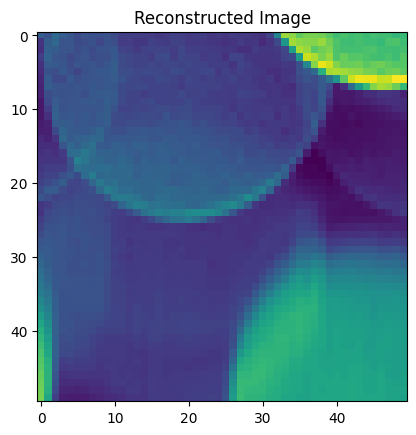

In [6]:
plt.imshow(new_image)
plt.title('Reconstructed Image')
plt.show()


e) Qué pasos seguiría usted para limpiar el ruido de una imagen?


1. **Transformada de Fourier**: Realizar DFT-2D en la imagen para transformarla al dominio de frecuencias.

2. **Análisis del Dominio de Frecuencia**: Analizar la imagen en el dominio de frecuencias y buscar frecuencias anomalas (muy altas o muy bajas o con componentes muy bajos)

3. **Filtrar**: usar filtros para frecuencias muy altas, bajas o de muy poca significancia

4. **Transformada Inversa**: Realizar la Transformada Discreta de Fourier Inversa para llevar la imagen filtrada de vuelta al dominio original.
